In [1]:
#manipulacao de dados
import numpy as np
import pandas as pd

In [2]:
#vizualizacao de dados
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [25]:
#redes neurais
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [5]:
#importando o dataset padrap
df = sns.load_dataset("titanic")

In [6]:
#analisando as 5 primeiras linhas do dataset
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
#informacoes gerais do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [9]:
#analise estatistica
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
#verificando valores nulos
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [11]:
#distribuicao da variável alvo
df['survived'].value_counts()

,count
survived,
0,549
1,342


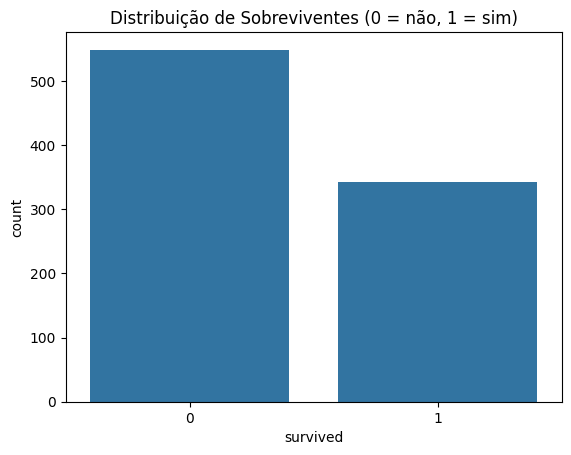

In [12]:
sns.countplot(x="survived", data=df)
plt.title("Distribuição de Sobreviventes (0 = não, 1 = sim)")
plt.show()

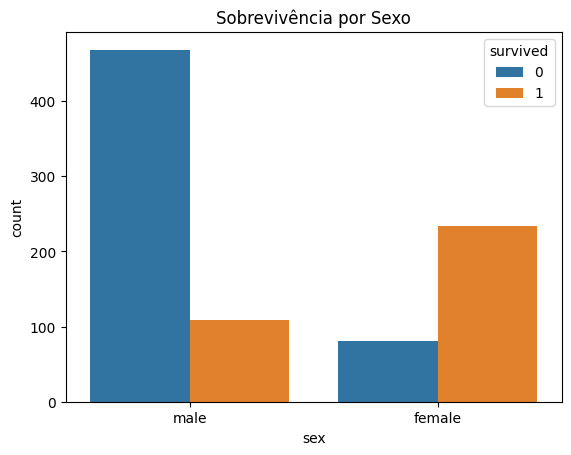

In [14]:
#sobrevivencia por sexo
sns.countplot(x="sex", hue="survived", data=df)
plt.title("Sobrevivência por Sexo")
plt.show()

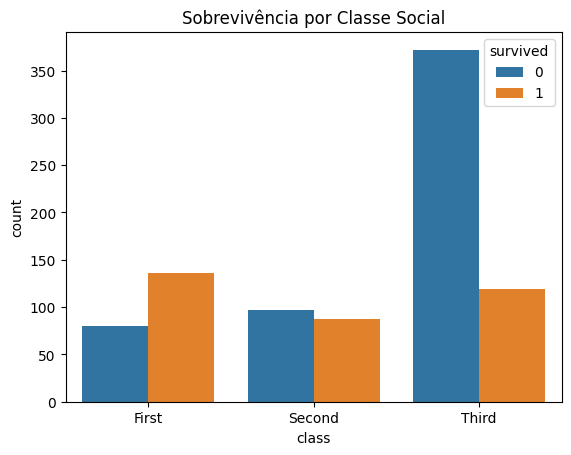

In [15]:
#sobrevivencia por classe social
sns.countplot(x="class", hue="survived", data=df)
plt.title("Sobrevivência por Classe Social")
plt.show()

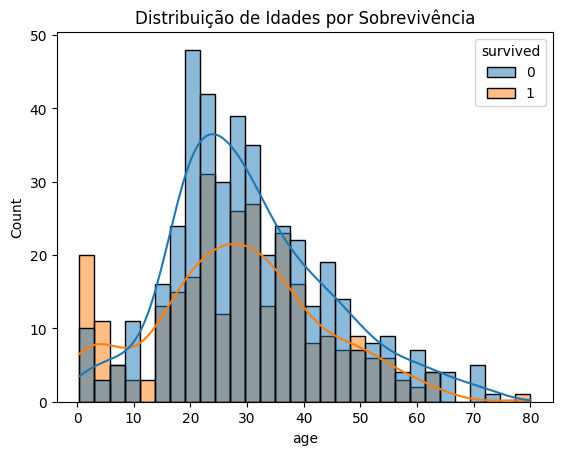

In [16]:
sns.histplot(data=df, x="age", hue="survived", bins=30, kde=True)
plt.title("Distribuição de Idades por Sobrevivência")
plt.show()

In [17]:
#copia do dataset
df_copy = df.copy()

In [18]:
#removendo colunas desnecessárias
data = df_copy.drop(columns=["deck", "alive", "embark_town", "class", "who", "adult_male", "alone"])

In [19]:
#tratando valores nulos
#preenchendo a idade com a média
data["age"].fillna(data["age"].mean(), inplace=True)

/tmp/ipython-input-1119483067.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["age"].fillna(data["age"].mean(), inplace=True)


In [20]:
# Preencher embarque (embarked) com o valor mais comum
data["embarked"].fillna(data["embarked"].mode()[0], inplace=True)

# Preencher fare (tarifa) com a média (caso tenha nulos)
data["fare"].fillna(data["fare"].mean(), inplace=True)

/tmp/ipython-input-3480762437.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["embarked"].fillna(data["embarked"].mode()[0], inplace=True)
/tmp/ipython-input-3480762437.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [21]:
# Codificar sexo (male=0, female=1)
data["sex"] = data["sex"].map({"male": 0, "female": 1})

# Codificar 'embarked' (C, Q, S) usando LabelEncoder
le = LabelEncoder()
data["embarked"] = le.fit_transform(data["embarked"])

In [22]:
print("📌 Dados prontos após ETL:")
print(data.head())
print("\nValores nulos restantes:", data.isnull().sum().sum())

📌 Dados prontos após ETL:
   survived  pclass  sex   age  sibsp  parch     fare  embarked
0         0       3    0  22.0      1      0   7.2500         2
1         1       1    1  38.0      1      0  71.2833         0
2         1       3    1  26.0      0      0   7.9250         2
3         1       1    1  35.0      1      0  53.1000         2
4         0       3    0  35.0      0      0   8.0500         2

Valores nulos restantes: 0


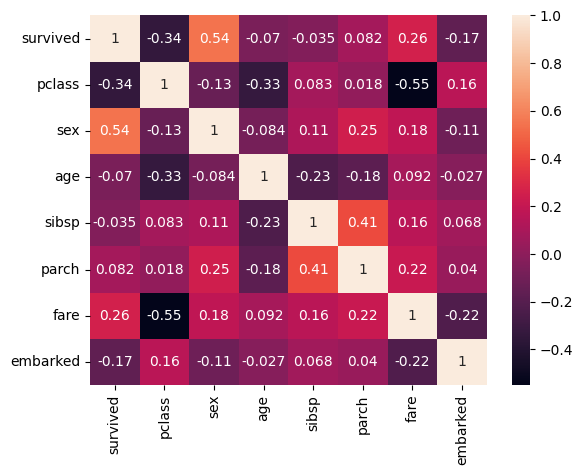

In [23]:
#matriz de correlacao
corr = data.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ====== 1. Separar variáveis preditoras (X) e alvo (y) ======
X = data.drop(columns=["survived"])
y = data["survived"]

# ====== 2. Dividir em treino e teste ======
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ====== 3. Normalizar as features numéricas ======
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("📌 Formato dos dados de treino:", X_train_scaled.shape)
print("📌 Formato dos dados de teste:", X_test_scaled.shape)


📌 Formato dos dados de treino: (712, 7)
📌 Formato dos dados de teste: (179, 7)


In [26]:
# Construção do modelo
model = Sequential()

# Camada de entrada + 1ª camada oculta
model.add(Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.3))

# 2ª camada oculta
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))

# Camada de saída (binária)
model.add(Dense(1, activation='sigmoid'))

# Compilar o modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Resumo do modelo
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 801 (3.13 KB)

 Trainable params: 801 (3.13 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Treinamento
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,  # 20% dos dados de treino para validação
    epochs=50,
    batch_size=32,
    verbose=1
)


Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5311 - loss: 0.6995 - val_accuracy: 0.7692 - val_loss: 0.6242
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6781 - loss: 0.6358 - val_accuracy: 0.7902 - val_loss: 0.5829
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6912 - loss: 0.6062 - val_accuracy: 0.7762 - val_loss: 0.5506
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7281 - loss: 0.5864 - val_accuracy: 0.7762 - val_loss: 0.5249
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7410 - loss: 0.5393 - val_accuracy: 0.7762 - val_loss: 0.5039
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7715 - loss: 0.5383 - val_accuracy: 0.7762 - val_loss: 0.4890
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7960 - loss: 0.5147 - val_accuracy: 0.7972 - val_loss: 0.4773
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7656 - loss: 0.5361 - val_accuracy: 0.7902 - val_loss

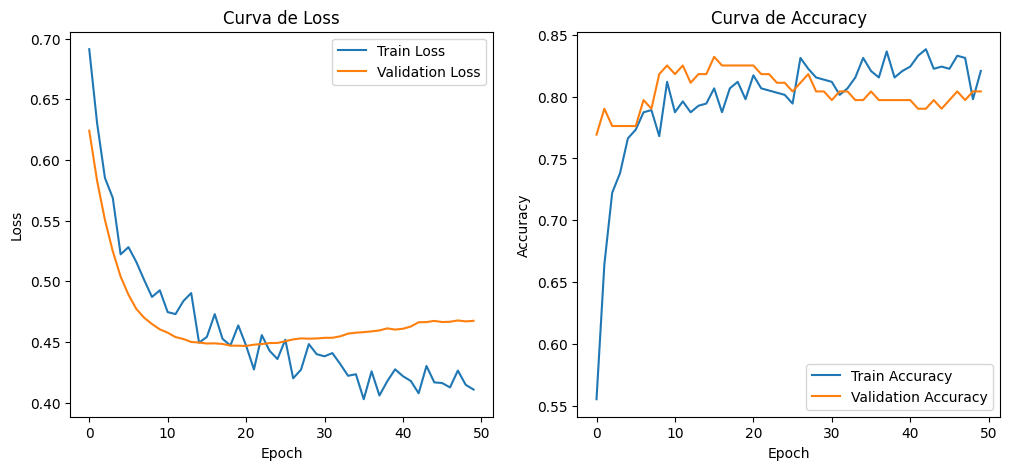

In [28]:
# Plotar curvas de Loss
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Curva de Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotar curvas de Accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Curva de Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
📌 Accuracy: 0.8045
📌 Precision: 0.8542
📌 Recall: 0.5942
📌 F1-score: 0.7009


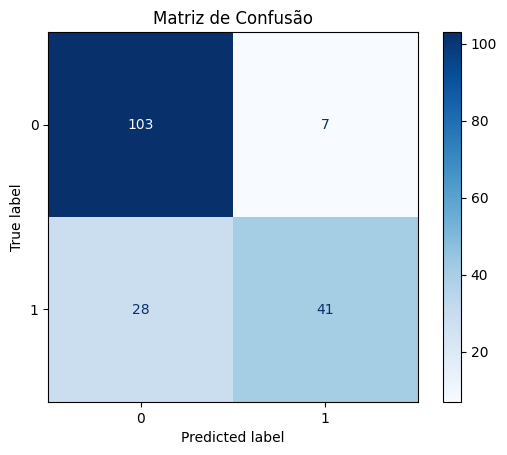

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Previsões no conjunto de teste
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Métricas
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"📌 Accuracy: {acc:.4f}")
print(f"📌 Precision: {prec:.4f}")
print(f"📌 Recall: {rec:.4f}")
print(f"📌 F1-score: {f1:.4f}")

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão")
plt.show()
